<a href="https://colab.research.google.com/github/pachterlab/monod/blob/nn-integration/nn_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf monod

In [2]:
!git clone -b nn-integration https://github.com/pachterlab/monod.git

Cloning into 'monod'...
remote: Enumerating objects: 625, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 625 (delta 150), reused 241 (delta 132), pack-reused 343
Receiving objects: 100% (625/625), 1.69 MiB | 6.16 MiB/s, done.
Resolving deltas: 100% (336/336), done.


In [3]:
import sys
sys.path.insert(0, '/content/monod/src')

In [4]:
import monod
from monod import cme_toolbox

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
b = 10
beta = 1.0
gamma = 2.0
p = np.log10(np.asarray([b,beta,gamma]))

In [7]:
limits = [100,50]

In [8]:
model_baseline = monod.cme_toolbox.CMEModel('Bursty','None')

In [9]:
Pss_baseline = model_baseline.eval_model_pss(p,limits)

Text(0, 0.5, 'Mature')

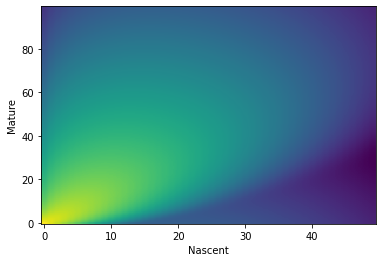

In [10]:
plt.imshow(np.log10(Pss_baseline),aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Nascent')
plt.ylabel('Mature')

In [11]:
n_cells = 1000
X, Y = np.meshgrid(np.arange(limits[0]), np.arange(limits[1]), indexing="ij")
X = X.flatten()
Y = Y.flatten()
x = np.random.choice(np.arange(len(X)), p=Pss_baseline.flatten(), size=n_cells, replace=True)
raw_counts = np.zeros((2,n_cells),dtype=int)
raw_counts[0] = X[x]
raw_counts[1] = Y[x]


In [12]:
raw_counts

array([[47, 12, 10, ...,  4,  0,  3],
       [ 7, 11,  5, ...,  6,  0,  7]])

In [13]:
unique, unique_counts = np.unique(
    np.vstack(raw_counts).T, axis=0, return_counts=True
)
frequencies = unique_counts / n_cells
unique = unique.astype(int)
data = (unique, frequencies)


In [14]:
model_baseline.eval_model_kld(p, limits, "None", data)

0.39764833852458015

Text(0, 0.5, 'KLD')

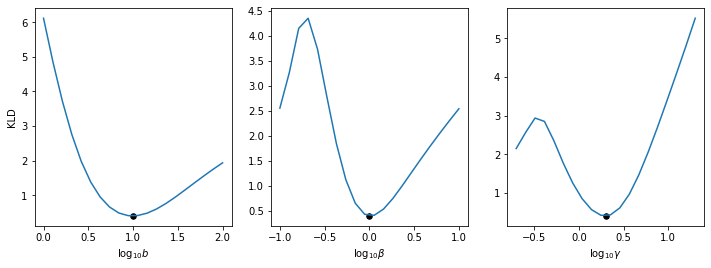

In [15]:
fig1,ax1=plt.subplots(1,3,figsize=(12,4))
param_names = model_baseline.get_log_name_str()
for k in range(3):
    # for 
    domain = p[k] + np.linspace(-1,1,20)
    kld = []
    for d in domain:
        p_ = np.copy(p)
        p_[k] = d
        kld_ = model_baseline.eval_model_kld(p_, limits, "None", data)
        kld.append(kld_)
    ax1[k].plot(domain,kld)
    kld_ = model_baseline.eval_model_kld(p, limits, "None", data)
    ax1[k].scatter(p[k],kld_,30,'k')
    ax1[k].set_xlabel(param_names[k])
ax1[0].set_ylabel('KLD')

In [16]:
model_nn = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn')

In [17]:
Pss = model_nn.eval_model_pss(p,limits)
kld_nn = model_nn.eval_model_kld(p, limits, "None", data)

Text(0, 0.5, 'Nascent')

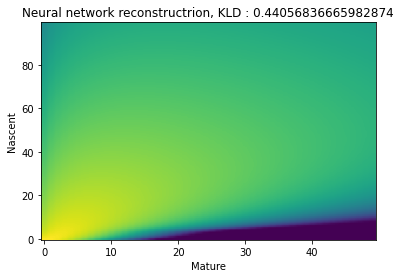

In [18]:
plt.title(f'Neural network reconstructrion, KLD : {kld_nn}')
plt.imshow(np.log10(Pss),aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Mature')
plt.ylabel('Nascent')

In [19]:
model_nn_10 = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn_10')
Pss = model_nn_10.eval_model_pss(p,limits)
kld_nn_10 = model_nn_10.eval_model_kld(p, limits, "None", data)

Text(0, 0.5, 'Nascent')

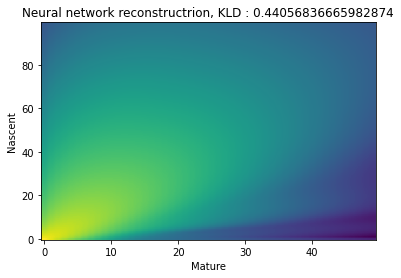

In [20]:
plt.title(f'Neural network reconstructrion, KLD : {kld_nn}')
plt.imshow(np.log10(Pss),aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Mature')
plt.ylabel('Nascent')

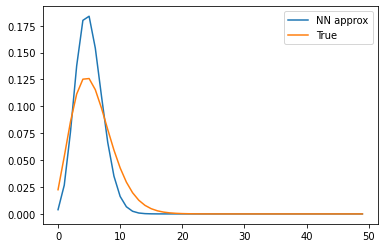

In [21]:
N = 10
plt.plot(Pss[N,:]/np.sum(Pss[N,:]),label = 'NN approx')
plt.plot(Pss_baseline[N,:]/np.sum(Pss_baseline[N,:]),label='True')
plt.legend()

Text(0, 0.5, 'KLD')

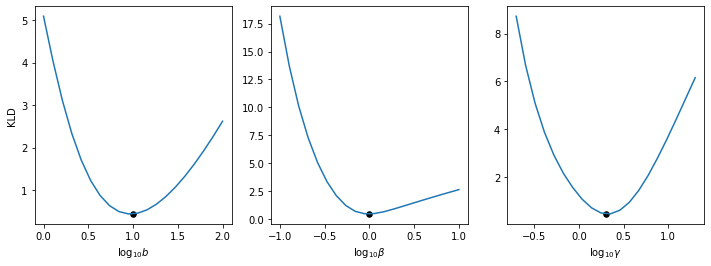

In [22]:
fig1,ax1=plt.subplots(1,3,figsize=(12,4))
param_names = model_nn.get_log_name_str()
for k in range(3):
    # for 
    domain = p[k] + np.linspace(-1,1,20)
    kld = []
    for d in domain:
        p_ = np.copy(p)
        p_[k] = d
        kld_ = model_nn.eval_model_kld(p_, limits, "None", data)
        kld.append(kld_)
    ax1[k].plot(domain,kld)
    kld_ = model_nn.eval_model_kld(p, limits, "None", data)
    ax1[k].scatter(p[k],kld_,30,'k')
    ax1[k].set_xlabel(param_names[k])
ax1[0].set_ylabel('KLD')

In [23]:
model_const = monod.cme_toolbox.CMEModel('Constitutive','None')

In [24]:
Pss = model_const.eval_model_pss(p[1:],limits)
kld_const = model_const.eval_model_kld(p[1:], limits, "None", data)

Text(0, 0.5, 'Mature')

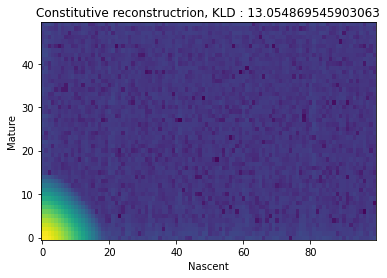

In [25]:
plt.title(f'Constitutive reconstructrion, KLD : {kld_const}')
plt.imshow(np.log10(Pss).T,aspect='auto')
plt.gca().invert_yaxis()
plt.xlabel('Nascent')
plt.ylabel('Mature')